In [1]:
import cPickle
import pandas as pd
import matplotlib.pyplot as plt
from peakutils.plot import plot as pplot

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import os 
import glob 
from sklearn.preprocessing import normalize
import numpy as np

In [3]:
dir1='/Users/shreyakapoor/Desktop/EEG/DATASETS/DEAP'
os.chdir(dir1)


In [4]:
name=[]
for i in glob.glob('*'): 
    name.append(i)

In [5]:
x=[]
for i in range(len(name)): 
    x.append(cPickle.load(open(name[i],'rb')))

In [6]:
channels=['fp1',
'af3',
'f7',
'f3',
'fc1',
'fc5',
't7',
'c3',
'cp1',
'cp5',
'p7',
'p3',
'px',
'po3',
'o1',
'oz',
'po4',
'p4',
'p8',
'cp6',
'cp2',
'c4',
't8',
'fc6',
'fc2',
'f4', 
'f8', 
'af4',
'fp2', 
'fz',
'cz']


In [7]:
mat=np.zeros((32,40,7680))

Created a list for all 40 channels and taking values for each subject. 

Took the moving average across each channel for the first trial 
of each subject

First only the moving average for all the data was taken

In [8]:

for i in range(32):
    new=x[i]['data']
    for j in range(40): 
        x2=(new[:,j,:]).reshape(new.shape[2],new.shape[1])
        #removing the first 3 seconds as startup time 
        #for first trial
        a=pd.DataFrame(x2[3*128:,0])
        a=pd.rolling_mean(a,128)
        #moving average for a one second window is taken 
        #since there are 128 samples in each window 
        a.fillna(a.mean(),inplace=True)
        a=np.array(a)
        a=a.reshape(-1)
        mat[i,j,:]=a
        

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=128,center=False).mean()


In [9]:
mat=mat.reshape(mat.shape[2],mat.shape[1],mat.shape[0])

now the data is 7680x40x32 
that is first trial for all 32 subjects across 40 channels


Normalize the data according to the channel so that values for different 
subjects across each channel can be measured for comparison.

In [10]:
matnorm=np.zeros((7680,40,32))

for j in range(40): 
         s=mat[:,j,:]
         s=normalize(s)
         matnorm[:,j,:]=s
    
    

In [11]:
print s.shape

(7680, 32)


In [12]:
min(s[:,0])

-0.62201931616280381

In [13]:
max(s[:,0])

0.55248783646871813

In [14]:
from scipy.signal import argrelextrema

optimum radius from experimentation was obtained to be=16

for the first channel

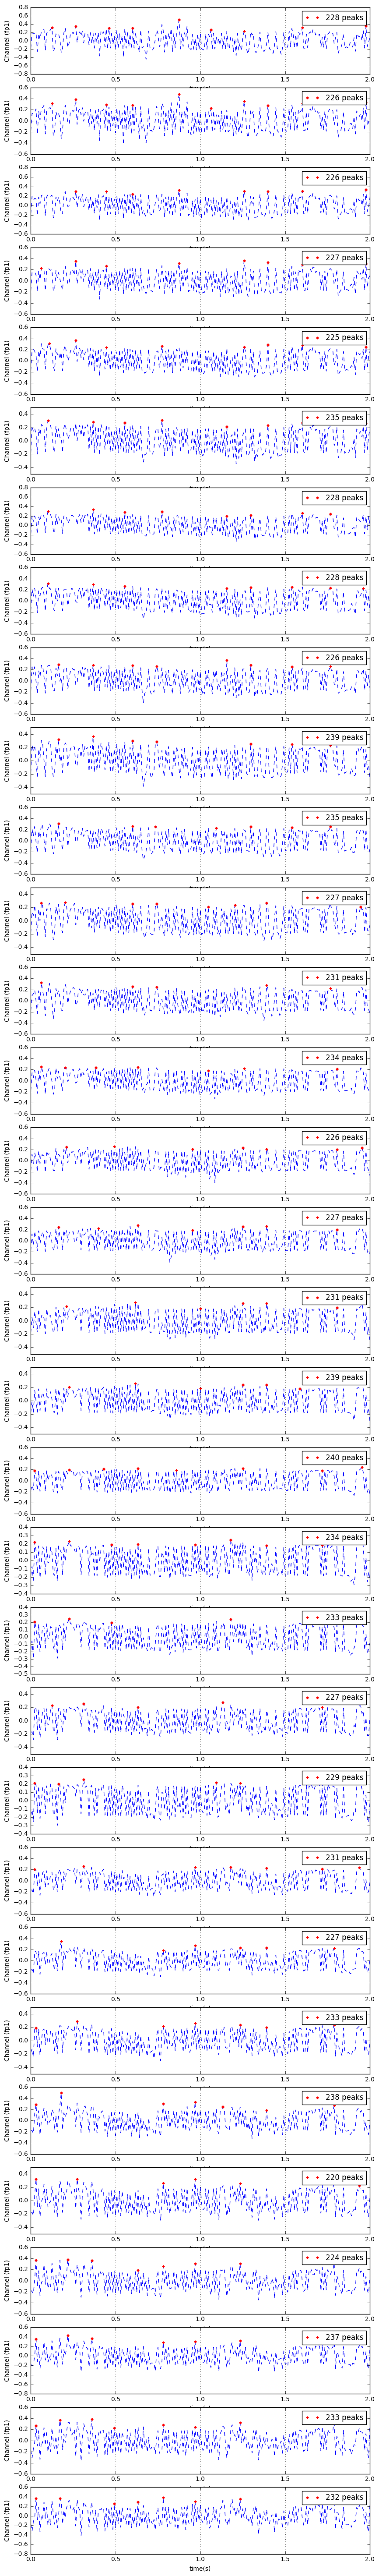

In [15]:

radius=16;
fig=plt.figure(figsize=(10,75),dpi= 80, facecolor='w', edgecolor='k')
for j in range(32): 
        a=matnorm[:,0,j]
        b=np.linspace(0,60,num=8064-3*128)
        ax=fig.add_subplot(32,1,j+1)
        ax.set_xlabel('time(s)')
        ax.set_ylabel('Channel (fp1)')
        peaks=argrelextrema(a,np.greater,order=radius)
        peaks=np.array(peaks)
        peaks=peaks.reshape([-1])
        pplot(b,a,peaks)
        ax.xaxis.grid(True)
        ax.set_xlim(0,2)
plt.show()
        
        

Record peak indices for all channels

In [16]:
peakindices=[]
for i in range(40): 
    for j in range(32): 
        peakindices.append([])
        

In [17]:
#each row consists of the peaks along each channel
num=0;
for i in range(40): 
    for j in range(32): 
        a=matnorm[:,i,j]
        peaks=argrelextrema(a,np.greater,order=radius,mode='clip')
        peaks=np.array(peaks)
        peaks=peaks.reshape([-1])
        peakindices[num]=peaks
        num+=1

peak indices for 1st channel 

taking the average of the indices for all channels where the peaks are being detected

In [18]:
#take the indiexes which are present in all the subjects at the same time 
peakfp1=[]
peakfp1.append(peakindices[0])
peakfp1[0].shape[-1]                    
            
            

228

if we try with argrelmax

In [21]:
from scipy.signal import argrelmax

In [22]:
peakindices2=[]
for i in range(40): 
    for j in range(32): 
        peakindices2.append([])

In [27]:
num=0;
for i in range(40): 
    for j in range(32): 
        a=matnorm[:,i,j]
        peaks=argrelmax(a,order=radius,mode='clip')
        peaks=np.array(peaks)
        peaks=peaks.reshape([-1])
        peakindices2[num]=peaks
        num+=1;
    

There has been an arrangement according to the channels, for 1st channel the 1st 32 subjects are taken and their peaks are indexed. 
For the 2nd channel the 32 subjects are taken and their peaks are indexed. For the 3rd channel the 32 subjects are 
taken and their peaks are indexed for the following.

Counting the number of peaks in 1 second, in each second.  

In [106]:
numpeaks=np.zeros((40,32,60))


Take 40 channels, 32 subjects and 60 seconds.

In [153]:
num=0
for i in range(40): 
    for j in range(32):
        index2=128;#starting of the index 
        index1=0;
        for a in range(60):
            count=0;
              #ending of the index
            #mulitplication due to the timestamp from 0 to 60 seconds
            for k in range(len(peakindices[num])):
                    if(peakindices2[num][k] in range(index1,index2)): 
                           count=count+1
                        
            index1=index2  
            index2=index1+128
            numpeaks[i][j][a]=count  
              
        num+=1 

In [159]:
from scipy import signal

In [161]:
fs=128 #the sampling frequency is 128 Hz

Power spectral density according to the time intervals has to be taken and hence we divide the data into sample size according to number of samples in the 
data for 1 second.




Hence dividing the data into samples 7680/128=60 and hence 
60 samples accordingly.

1st trial for 1st channel for all subjects and calculation
of their PSD values by dividing into equal parts.

In [162]:
matnorm.shape

(7680, 40, 32)

Including the first trial for the first subject  in the first channel

In [173]:
A=matnorm[0:128,0,1]

In [174]:
f,Pxx_den=signal.welch(A,fs)

//anaconda/lib/python2.7/site-packages/scipy/signal/spectral.py:772: UserWarning: nperseg = 256, is greater than input length = 128, using nperseg = 128
  'using nperseg = {1:d}'.format(nperseg, x.shape[-1]))


In [175]:
Pxx_den.shape

(65,)

In [176]:
f.shape

(65,)

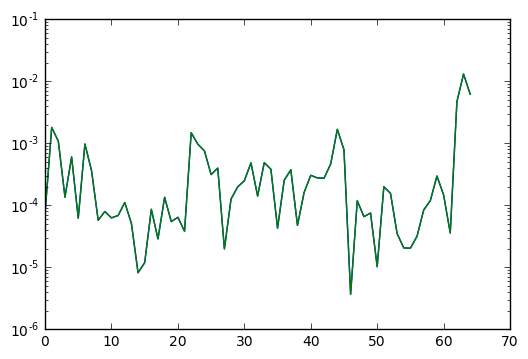

In [181]:
plt.semilogy(f,Pxx_den)
plt.show()

In [182]:
from sklearn import metrics 

Area under curve using frequency distribution and power distribution using trapezoidal rule.

In [185]:

d=metrics.auc(f,Pxx_den)

In [186]:
d*numpeaks[0][1][1]

0.19534251270370678

In [187]:
feature=np.zeros((40,32,60))
num=0
for i in range(40): 
    for j in range(32):
        index2=128;#starting of the index 
        index1=0;
        for a in range(60):
            count=0;
            #ending of the index
            #mulitplication due to the timestamp from 0 to 60 seconds     
            A=matnorm[index1:index2,i,j]
            index1=index2  
            index2=index1+128
            f,Pxx_den=signal.welch(A,fs)
            d=metrics.auc(f,Pxx_den)
            feature[i][j][a]=d*numpeaks[i][j][a] 
              
        num+=1 